

# Natural Language Processing (NLP) 📖


Analyzing the corpus of text using text visualizations of token frequency.
- Lemmatization
- Custom stopword removal



## Get spacy model

In [ ]:
# Locally (or on colab) let's use en_core_web_lg (lg stands for the 560 MB version while md stands for the 40 MB version)
!python -m spacy download en_core_web_md # Can do lg, takes awhile
# Also on Colab, need to restart runtime after this step!

2023-06-26 17:37:36.752550: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 12.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


## Install packages and do imports
# Remember to restart runtime after loading in the spacy package

In [ ]:
!pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

-----

## Loading in data

In [ ]:
url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/main/module1-text-data/data/yelp_coffeeshop_review_data.csv"

df = pd.read_csv(url)
df.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [ ]:
df['full_review_text'][0]

' 11/25/2016 1 check-in Love love loved the atmosphere! Every corner of the coffee shop had its own style, and there were swings!!! I ordered the matcha latte, and it was muy fantastico! Ordering and getting my drink were pretty streamlined. I ordered on an iPad, which included all beverage selections that ranged from coffee to wine, desired level of sweetness, and a checkout system. I got my latte within minutes!  I was hoping for a typical heart or feather on my latte, but found myself listing out all the possibilities of what the art may be. Any ideas? '

## Save Dates for later use
Good valuable feature for later on we will be useful information when we clean the text.



In [ ]:
# grab date from the beginning of the review text
def get_date(text):
  return text.split(' ')[1]

df['date'] = df['full_review_text'].apply(get_date)

In [ ]:
df

,coffee_shop_name,full_review_text,star_rating,date
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,11/25/2016
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,12/2/2016
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,11/30/2016
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,11/25/2016
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,12/3/2016
...,...,...,...,...
7611,The Steeping Room,2/19/2015 I actually step into this restauran...,4.0 star rating,2/19/2015
7612,The Steeping Room,"1/21/2016 Ok, The Steeping Room IS awesome. H...",5.0 star rating,1/21/2016
7613,The Steeping Room,"4/30/2015 Loved coming here for tea, and the ...",4.0 star rating,4/30/2015
7614,The Steeping Room,8/2/2015 The food is just average. The booths...,3.0 star rating,8/2/2015


In [ ]:
# Another approach (we could also use regular expressions to grab the dates)
import re

def find_first_date(text):
  #return re.findall('\d+\/\d+\/\d+', text)[0]
  return re.findall(r'\d+/\d+/\d+', text)[0]

example_text = " 11/25/2016 1 check-in Love love loved the atmosphere! Every corner of the coffee shop had its own style, and there were swings!!! I ordered the matcha latte, and it was muy fantastico! Ordering and getting my drink were pretty streamlined. I ordered on an iPad, which included all beverage selections that ranged from coffee to wine, desired level of sweetness, and a checkout system. I got my latte within minutes!  I was hoping for a typical heart or feather on my latte, but found myself listing out all the possibilities of what the art may be. Any ideas? "

find_first_date(example_text)

'11/25/2016'

In [ ]:
print(df['date'].iloc[0])
print(type(df['date'].iloc[0]))

11/25/2016
<class 'str'>


In [ ]:
# turn date column strings into datetime objects
df['date'] = pd.to_datetime(df['date'], infer_datetime_format=True)

In [ ]:
print(type(df['date'][0]))
print(df['date'].iloc[0])

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2016-11-25 00:00:00


In [ ]:
dir(df['date'].iloc[0])

['__add__',
 '__array_priority__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__pyx_vtable__',
 '__radd__',
 '__reduce__',
 '__reduce_cython__',
 '__reduce_ex__',
 '__repr__',
 '__rsub__',
 '__setattr__',
 '__setstate__',
 '__setstate_cython__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__weakref__',
 '_as_unit',
 '_date_repr',
 '_freq',
 '_freqstr',
 '_from_dt64',
 '_from_value_and_reso',
 '_repr_base',
 '_reso',
 '_round',
 '_set_freq',
 '_short_repr',
 '_time_repr',
 'asm8',
 'astimezone',
 'ceil',
 'combine',
 'ctime',
 'date',
 'day',
 'day_name',
 'day_of_week',
 'day_of_year',
 'dayofweek',
 'dayofyear',
 'days_in_month',
 'daysinmonth',
 'dst',
 'floor',
 'fold',
 'freq',
 'freqstr',
 'fromisocalendar',
 'fromisoformat',
 'fromordinal',
 'fromtimestamp',
 'ho

In [ ]:
df['date'].iloc[0].day_name()

'Friday'

In [ ]:
df.head()

,coffee_shop_name,full_review_text,star_rating,date
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,2016-11-25
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,2016-12-02
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,2016-11-30
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,2016-11-25
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,2016-12-03


In [ ]:
df['star_rating'].unique()

array([' 5.0 star rating ', ' 4.0 star rating ', ' 2.0 star rating ',
       ' 3.0 star rating ', ' 1.0 star rating '], dtype=object)

In [ ]:
df['star_rating'].value_counts()

 5.0 star rating     3780
 4.0 star rating     2360
 3.0 star rating      738
 2.0 star rating      460
 1.0 star rating      278
Name: star_rating, dtype: int64

In [ ]:
# looks like most dates are in late 2016
df['date'].value_counts()

2016-10-09    31
2016-09-18    30
2016-11-20    27
2016-11-02    27
2016-12-02    26
              ..
2012-03-06     1
2011-10-29     1
2012-03-14     1
2012-10-03     1
2013-01-09     1
Name: date, Length: 1592, dtype: int64

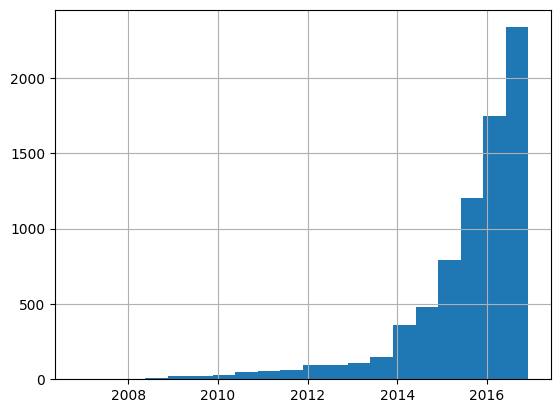

In [ ]:
# histogram of review dates to see when most reviews were left
# just a little EDA
df['date'].hist(bins=20);

## Clean Review Text (with Regular Expressions `regex`)


In [ ]:
import re
# considering using regex to remove dates
# you can create and test regular expressions on this online regex editor: https://regex101.com/

def clean_data(text):
    """
    Accepts a single text document and performs several regex substitutions in order to clean the document.

    Parameters
    ----------
    text: string or object

    Returns
    -------
    text: string or object
    """

    # order of operations - apply the expression from top to bottom
    date_regex = r"\d+/\d+/\d+"
    punct_regex = r"[^0-9a-zA-Z\s]" # any non-alphanumeric chars
    special_chars_regex = r"[\$\%\&\@+]"
    numerical_regex = r"\d+"  # match one or more digits

    # Replace any strings matching the above regex patterns with blank strings
    # (effectively removing them from the text)
    text = re.sub(date_regex, " ", text)
    text = re.sub(punct_regex, " ", text)
    text = re.sub(special_chars_regex, " ", text)
    text = re.sub(numerical_regex, " ", text)

    # match one or more whitespace chars
    whitespace_regex = r"\s+"
    # replace one or more whitespace characters with a single white space char
    #    not a blank string!
    text = re.sub(whitespace_regex, " ", text)


    # apply case normalization
    text = text.lower()
    return text

In [ ]:
df['cleaned_review'] = df['full_review_text'].apply(clean_data)

df['cleaned_review'][0]

' check in love love loved the atmosphere every corner of the coffee shop had its own style and there were swings i ordered the matcha latte and it was muy fantastico ordering and getting my drink were pretty streamlined i ordered on an ipad which included all beverage selections that ranged from coffee to wine desired level of sweetness and a checkout system i got my latte within minutes i was hoping for a typical heart or feather on my latte but found myself listing out all the possibilities of what the art may be any ideas '

## 1.2. Tokenize the cleaned up reviews

In [ ]:
# with a for loop
tokens = []
for review in df['cleaned_review']:
  tokens.append(review.split(' '))

df['tokens'] = tokens

df.head()

,coffee_shop_name,full_review_text,star_rating,date,cleaned_review,tokens,lemmas
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,2016-11-25,check in love love loved the atmosphere every...,"[, check, in, love, love, loved, the, atmosphe...","[11/25/2016, 1, check, -, Love, love, love, at..."
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,2016-12-02,listed in date night austin ambiance in austi...,"[, listed, in, date, night, austin, ambiance, ...","[12/2/2016, Listed, Date, Night, :, Austin, ,,..."
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,2016-11-30,check in listed in brunch spots i loved the e...,"[, check, in, listed, in, brunch, spots, i, lo...","[11/30/2016, 1, check, -, list, Brunch, spot, ..."
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,2016-11-25,very cool decor good drinks nice seating howe...,"[, very, cool, decor, good, drinks, nice, seat...","[11/25/2016, cool, decor, !, good, drink, nice..."
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,2016-12-03,check in they are located within the northcro...,"[, check, in, they, are, located, within, the,...","[12/3/2016, 1, check, -, locate, Northcross, m..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7616 entries, 0 to 7615
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   coffee_shop_name  7616 non-null   object        
 1   full_review_text  7616 non-null   object        
 2   star_rating       7616 non-null   object        
 3   date              7616 non-null   datetime64[ns]
 4   cleaned_review    7616 non-null   object        
 5   tokens            7616 non-null   object        
 6   lemmas            7616 non-null   object        
dtypes: datetime64[ns](1), object(6)
memory usage: 416.6+ KB


In [ ]:
# with a list comprehension
df['tokens'] = [text.split() for text in df['cleaned_review']]
df.head()

,coffee_shop_name,full_review_text,star_rating,date,cleaned_review,tokens,lemmas
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,2016-11-25,check in love love loved the atmosphere every...,"[check, in, love, love, loved, the, atmosphere...","[11/25/2016, 1, check, -, Love, love, love, at..."
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,2016-12-02,listed in date night austin ambiance in austi...,"[listed, in, date, night, austin, ambiance, in...","[12/2/2016, Listed, Date, Night, :, Austin, ,,..."
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,2016-11-30,check in listed in brunch spots i loved the e...,"[check, in, listed, in, brunch, spots, i, love...","[11/30/2016, 1, check, -, list, Brunch, spot, ..."
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,2016-11-25,very cool decor good drinks nice seating howe...,"[very, cool, decor, good, drinks, nice, seatin...","[11/25/2016, cool, decor, !, good, drink, nice..."
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,2016-12-03,check in they are located within the northcro...,"[check, in, they, are, located, within, the, n...","[12/3/2016, 1, check, -, locate, Northcross, m..."


### Visualize the most common tokens


In [ ]:
from collections import Counter

def count(token_lists):
    """
    Calculates some basic statistics about tokens in our corpus (i.e. corpus means collections text data)
    """
    # stores the count of each token
    word_counts = Counter()

    # stores the number of docs that each token appears in
    appears_in_docs = Counter()

    total_docs = len(token_lists)

    for token_list in token_lists:
        # stores count of every appearance of a token
        word_counts.update(token_list)

        # count the num of docs that each token appears in
        appears_in_docs.update(set(token_list))

    # build word count dataframe
    word_count_dict = zip(word_counts.keys(), word_counts.values())
    wc = pd.DataFrame(word_count_dict, columns = ['word', 'count'])

    # rank the the word counts
    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    total = wc['count'].sum()

    # calculate the percent total of each token
    wc['fraction_of_total'] = wc['count'].apply(lambda token_count: token_count / total)

    # calculate the cumulative percent total of word counts
    wc = wc.sort_values(by='rank')
    wc['cumulative_fraction_of_total'] = wc['fraction_of_total'].cumsum()

    # create dataframe for document stats
    t2 = zip(appears_in_docs.keys(), appears_in_docs.values())
    ac = pd.DataFrame(t2, columns=['word', 'appears_in_docs'])

    # merge word count stats with doc stats
    wc = ac.merge(wc, on='word')

    wc['appears_in_fraction_of_docs'] = wc['appears_in_docs'].apply(lambda x: x / total_docs)

    return wc.sort_values(by='rank')

#### Summary of the descriptive token statistics

`word` The specific token that is being analyzed

`appears_in_docs` Number of documents that the word/token appears in

`count` The total number of appearances of that token within the corpus

`rank` Ranking of tokens by count

`fraction_of_total` Fraction of the total tokens that this token makes up

`cumulative_fraction_of_total` Sum of fractional total of ranked tokens, down to and including this token.

`appears_in_fraction_of_docs` Fraction of documents that token appears in

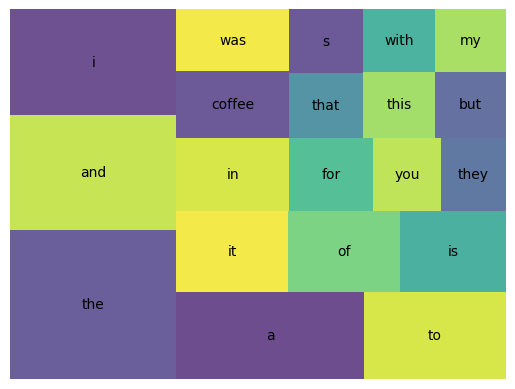

In [ ]:
# visualize the 20 most common tokens with squarify
# Lots of stopwords!


import squarify
import matplotlib.pyplot as plt

wc = count(df['tokens'])
wc_top20 = wc[wc['rank']<=20]


squarify.plot(sizes=wc_top20['fraction_of_total'], label=wc_top20['word'], alpha=.8 )
#
plt.axis('off')
plt.show();

## Clean, tokenize, remove stopwords, and lemmatize the reviews (with Spacy)
Writing a tokenize function with Spacy.

In [ ]:
import spacy
# import the large version of the pre-trained model
# depending on your computational resources/limitations, you might need to download and load in a smaller version of the model
# see the spaCy docs: https://spacy.io/models/en
nlp = spacy.load('en_core_web_md')

## Remove stop word, punctuation and whitespace from each token

In [ ]:
STOPS = nlp.Defaults.stop_words.union(['coffee', 'be', 'get', 'come', 'place', 'austin',
                                       'food', 'time', 'shop', 'checkin', 'drink', 'have',
                                       'come', 'latte', '-PRON-', 'order', 'tea', 's', 'people',
                                      'staff', 'service', 'want', 'try', 'work','I', 'i', ' ',
                                       'taste', 'flavor', 'find', 'spot', 'table', 'think',
                                      'know', 'day', 'look', 'barista', 'milk', 'parking', 'breakfast',
                                      'thing', 'atmosphere', 'seating', 'cup', 'sit'])

In [ ]:
# this will take longer to run than a regex method because Spacy is doing a fair amount
# of extra stuff under the hood in creating the token attributes and everything.

def spacy_tokenizer(text):
    """
    Use the pre-trained model from Space to tokenize our text into lemmas

    Notes
    -----
    Rememeber that the pre-trained spaCy model has a lot of built in flags for what kind of token each token is
    so we can use that functionality to create filters for stop words, white spaces, punctuation, and so on!

    See list of flags here: https://spacy.io/api/token#attributes

    Parameter
    ---------
    text: string
        Full text article/document that needs to be tokenized
    """
    doc = nlp(text)


    return [token.lemma_ for token in doc if (token.is_stop != True) and (token.is_space != True)]

In [ ]:
# This code cell takes ~ 3 minutes on Google Colab
%%time

df['spacy_tokens'] = df['cleaned_review'].apply(spacy_tokenizer)

CPU times: user 2min 4s, sys: 322 ms, total: 2min 4s
Wall time: 2min 5s


In [ ]:
df.spacy_tokens.iloc[:5]

0    [check, love, love, love, atmosphere, corner, ...
1    [list, date, night, austin, ambiance, austin, ...
2    [check, list, brunch, spot, love, eclectic, ho...
3    [cool, decor, good, drink, nice, seating, over...
4    [check, locate, northcross, mall, shopping, ce...
Name: spacy_tokens, dtype: object

In [ ]:
df.head()

,coffee_shop_name,full_review_text,star_rating,date,cleaned_review,tokens,lemmas,spacy_tokens
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,2016-11-25,check in love love loved the atmosphere every...,"[check, in, love, love, loved, the, atmosphere...","[11/25/2016, 1, check, -, Love, love, love, at...","[check, love, love, love, atmosphere, corner, ..."
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,2016-12-02,listed in date night austin ambiance in austi...,"[listed, in, date, night, austin, ambiance, in...","[12/2/2016, Listed, Date, Night, :, Austin, ,,...","[list, date, night, austin, ambiance, austin, ..."
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,2016-11-30,check in listed in brunch spots i loved the e...,"[check, in, listed, in, brunch, spots, i, love...","[11/30/2016, 1, check, -, list, Brunch, spot, ...","[check, list, brunch, spot, love, eclectic, ho..."
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,2016-11-25,very cool decor good drinks nice seating howe...,"[very, cool, decor, good, drinks, nice, seatin...","[11/25/2016, cool, decor, !, good, drink, nice...","[cool, decor, good, drink, nice, seating, over..."
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,2016-12-03,check in they are located within the northcro...,"[check, in, they, are, located, within, the, n...","[12/3/2016, 1, check, -, locate, Northcross, m...","[check, locate, northcross, mall, shopping, ce..."


## Visualize the Spacy Tokens

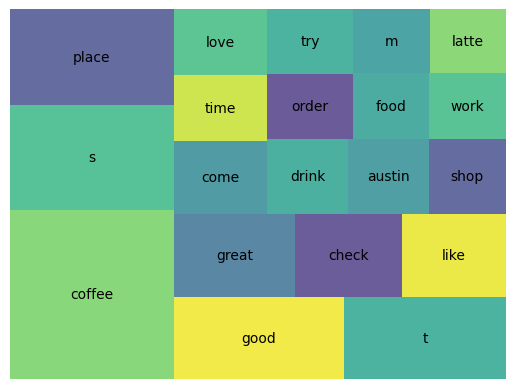

In [ ]:
wc = count(df['spacy_tokens'])

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['fraction_of_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

# Comparing High and Low Coffeeshop reviews!

- We'll say that a "good" rating is 4 or 5 stars
- a "bad" rating is 3 stars or less

In [ ]:
df.head()

,coffee_shop_name,full_review_text,star_rating,date,cleaned_review,tokens,lemmas,spacy_tokens
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,2016-11-25,check in love love loved the atmosphere every...,"[check, in, love, love, loved, the, atmosphere...","[11/25/2016, 1, check, -, Love, love, love, at...","[check, love, love, love, atmosphere, corner, ..."
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,2016-12-02,listed in date night austin ambiance in austi...,"[listed, in, date, night, austin, ambiance, in...","[12/2/2016, Listed, Date, Night, :, Austin, ,,...","[list, date, night, austin, ambiance, austin, ..."
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,2016-11-30,check in listed in brunch spots i loved the e...,"[check, in, listed, in, brunch, spots, i, love...","[11/30/2016, 1, check, -, list, Brunch, spot, ...","[check, list, brunch, spot, love, eclectic, ho..."
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,2016-11-25,very cool decor good drinks nice seating howe...,"[very, cool, decor, good, drinks, nice, seatin...","[11/25/2016, cool, decor, !, good, drink, nice...","[cool, decor, good, drink, nice, seating, over..."
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,2016-12-03,check in they are located within the northcro...,"[check, in, they, are, located, within, the, n...","[12/3/2016, 1, check, -, locate, Northcross, m...","[check, locate, northcross, mall, shopping, ce..."


In [ ]:
df['star_rating'].unique()

array([' 5.0 star rating ', ' 4.0 star rating ', ' 2.0 star rating ',
       ' 3.0 star rating ', ' 1.0 star rating '], dtype=object)

In [ ]:
df['stars'] = df['star_rating'].str.extract('(\d)').astype(int) # COMPLETE THE CODE

In [ ]:
type(df['stars'][0])

numpy.int64

In [ ]:
df.head()

,coffee_shop_name,full_review_text,star_rating,date,cleaned_review,tokens,lemmas,spacy_tokens,stars
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,2016-11-25,check in love love loved the atmosphere every...,"[check, in, love, love, loved, the, atmosphere...","[11/25/2016, 1, check, -, Love, love, love, at...","[check, love, love, love, atmosphere, corner, ...",5
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,2016-12-02,listed in date night austin ambiance in austi...,"[listed, in, date, night, austin, ambiance, in...","[12/2/2016, Listed, Date, Night, :, Austin, ,,...","[list, date, night, austin, ambiance, austin, ...",4
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,2016-11-30,check in listed in brunch spots i loved the e...,"[check, in, listed, in, brunch, spots, i, love...","[11/30/2016, 1, check, -, list, Brunch, spot, ...","[check, list, brunch, spot, love, eclectic, ho...",4
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,2016-11-25,very cool decor good drinks nice seating howe...,"[very, cool, decor, good, drinks, nice, seatin...","[11/25/2016, cool, decor, !, good, drink, nice...","[cool, decor, good, drink, nice, seating, over...",2
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,2016-12-03,check in they are located within the northcro...,"[check, in, they, are, located, within, the, n...","[12/3/2016, 1, check, -, locate, Northcross, m...","[check, locate, northcross, mall, shopping, ce...",4


In [ ]:

def star_rating_numeric(rating_string):
  return float(rating_string.split()[0])

df['star_rating'] = df['star_rating'].apply(star_rating_numeric)

df.head()

,coffee_shop_name,full_review_text,star_rating,date,cleaned_review,tokens,lemmas,spacy_tokens,stars
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0,2016-11-25,check in love love loved the atmosphere every...,"[check, in, love, love, loved, the, atmosphere...","[11/25/2016, 1, check, -, Love, love, love, at...","[check, love, love, love, atmosphere, corner, ...",5
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0,2016-12-02,listed in date night austin ambiance in austi...,"[listed, in, date, night, austin, ambiance, in...","[12/2/2016, Listed, Date, Night, :, Austin, ,,...","[list, date, night, austin, ambiance, austin, ...",4
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0,2016-11-30,check in listed in brunch spots i loved the e...,"[check, in, listed, in, brunch, spots, i, love...","[11/30/2016, 1, check, -, list, Brunch, spot, ...","[check, list, brunch, spot, love, eclectic, ho...",4
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0,2016-11-25,very cool decor good drinks nice seating howe...,"[very, cool, decor, good, drinks, nice, seatin...","[11/25/2016, cool, decor, !, good, drink, nice...","[cool, decor, good, drink, nice, seating, over...",2
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0,2016-12-03,check in they are located within the northcro...,"[check, in, they, are, located, within, the, n...","[12/3/2016, 1, check, -, locate, Northcross, m...","[check, locate, northcross, mall, shopping, ce...",4


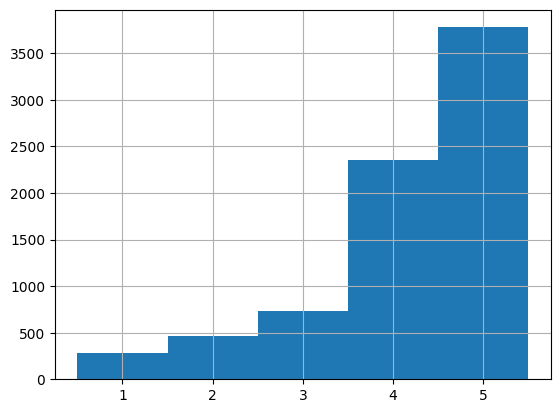

In [ ]:
# most coffee shops get 4 or 5 star ratings.
bin_edges = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5]
df['stars'].hist(bins=bin_edges);

## Split into two dataframes based on star rating
good: ratings 4 and 5 <br>
bad: ratings <4

In [ ]:

good = df[df['stars']>=4]
bad = df[df['stars']<4]

In [ ]:
# making sure that all reviews are accounted for in one of the two groups
assert df.shape[0] == good.shape[0] + bad.shape[0]

#### Summary of the descriptive token statistics

`word` The specific token that is being analyzed

`appears_in_docs` Number of documents that the word/token appears in

`count` The total number of appearances of that token within the corpus

`rank` Ranking of tokens by count

`fraction_of_total` Fraction of the total tokens that this token makes up

`cumulative_fraction_of_total` Sum of fractional total of ranked tokens, down to and including this token.

`appears_in_fraction_of_docs` Fraction of documents that token appears in

In [ ]:
good_wc = count(good["spacy_tokens"])
good_wc.head(10)

,word,appears_in_docs,count,rank,fraction_of_total,cumulative_fraction_of_total,appears_in_fraction_of_docs
17,coffee,4010,8573,1.0,0.029429,0.029429,0.653094
102,s,2682,5366,2.0,0.018420,0.047849,0.436808
117,place,3137,4828,3.0,0.016573,0.064423,0.510912
177,good,2944,4405,4.0,0.015121,0.079544,0.479479
116,great,2514,3494,5.0,0.011994,0.091538,0.409446
121,t,2162,3473,6.0,0.011922,0.103460,0.352117
4,check,2686,2942,7.0,0.010099,0.113559,0.437459
181,like,1684,2443,8.0,0.008386,0.121946,0.274267
18,love,1613,2133,9.0,0.007322,0.129268,0.262704
50,austin,1592,2050,10.0,0.007037,0.136305,0.259283


In [ ]:
bad_wc = count(bad["spacy_tokens"])
bad_wc.head(10)

,word,appears_in_docs,count,rank,fraction_of_total,cumulative_fraction_of_total,appears_in_fraction_of_docs
8,coffee,956,2223,1.0,0.027029,0.027029,0.647696
137,t,859,1678,2.0,0.020402,0.047431,0.581978
111,s,696,1322,3.0,0.016074,0.063505,0.471545
3,place,756,1234,4.0,0.015004,0.078509,0.512195
7,good,648,1004,5.0,0.012207,0.090717,0.439024
12,like,596,948,6.0,0.011527,0.102243,0.403794
148,order,440,780,7.0,0.009484,0.111727,0.298103
145,come,452,650,8.0,0.007903,0.119630,0.306233
2,drink,367,617,9.0,0.007502,0.127132,0.248645
211,time,425,617,10.0,0.007502,0.134634,0.287940


## Visualize top 20 `good` and top 20 `bad` tokens using a word cloud

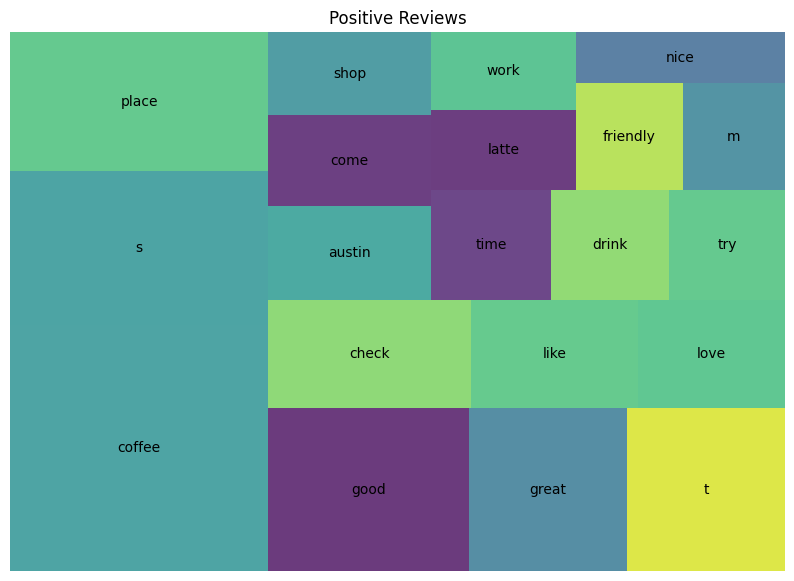

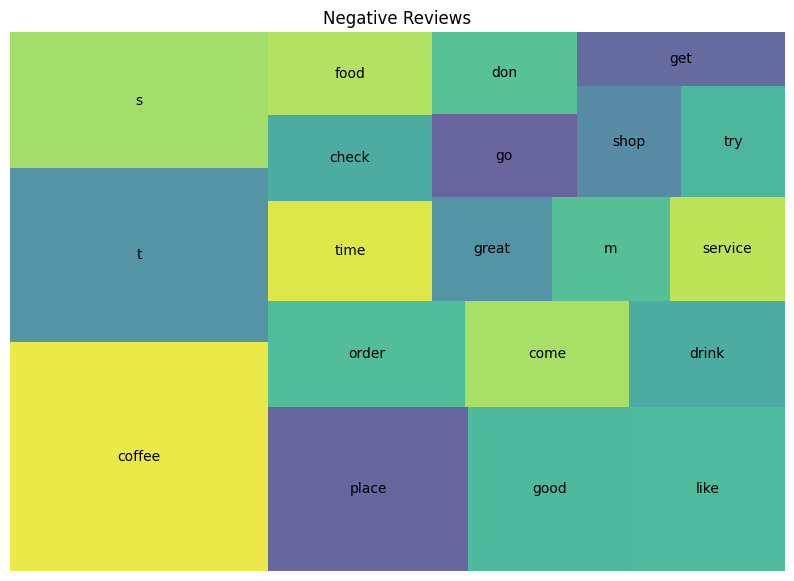

In [ ]:

good_top20 = good_wc[good_wc['rank'] <= 20]
plt.figure(figsize=(10,7))
squarify.plot(sizes=good_top20['fraction_of_total'], label=good_top20['word'], alpha=.8 )
plt.title("Positive Reviews")
plt.axis('off')
plt.show()

bad_top20 = bad_wc[bad_wc['rank'] <= 20]
plt.figure(figsize=(10,7))
squarify.plot(sizes=bad_top20['fraction_of_total'], label=bad_top20['word'], alpha=.8 )
plt.title("Negative Reviews")
plt.axis('off')
plt.show()

## Find out which words are likely to occur in "good" and "bad" reviews


In [ ]:
# these are words that are ranked high in one data set but not the other
# you might try working with two keyword lists -- one for the good reviews and one for the bad reviews
good_key_words = ['enjoy', 'delicious', 'amazing', 'definitely', 'favorite', 'super', 'sweet']
bad_key_words = ['ask', 'price', 'wait', 'review', 'bad', 'feel', 'customer', 'star']

In [ ]:
good_wc.head()

,word,appears_in_docs,count,rank,fraction_of_total,cumulative_fraction_of_total,appears_in_fraction_of_docs
17,coffee,4010,8573,1.0,0.029429,0.029429,0.653094
102,s,2682,5366,2.0,0.018420,0.047849,0.436808
117,place,3137,4828,3.0,0.016573,0.064423,0.510912
177,good,2944,4405,4.0,0.015121,0.079544,0.479479
116,great,2514,3494,5.0,0.011994,0.091538,0.409446


In [ ]:
df_pos_keywords_mask = good_wc.word.isin(good_key_words)
df_pos_keywords = good_wc[df_pos_keywords_mask]
df_pos_keywords.head()

,word,appears_in_docs,count,rank,fraction_of_total,cumulative_fraction_of_total,appears_in_fraction_of_docs
592,delicious,1187,1323,25.0,0.004542,0.217105,0.193322
56,definitely,893,1007,34.0,0.003457,0.250908,0.145440
105,sweet,706,899,42.0,0.003086,0.276925,0.114984
585,amazing,689,790,52.0,0.002712,0.305870,0.112215
175,super,687,788,53.0,0.002705,0.308575,0.111889


In [ ]:
df_neg_keywords_mask = bad_wc.word.isin(bad_key_words)
df_neg_keywords = bad_wc[df_neg_keywords_mask]
df_neg_keywords.head()

,word,appears_in_docs,count,rank,fraction_of_total,cumulative_fraction_of_total,appears_in_fraction_of_docs
740,ask,220,326,30.0,0.003964,0.234957,0.149051
297,customer,186,294,34.0,0.003575,0.249742,0.126016
37,review,224,277,37.0,0.003368,0.260101,0.151762
209,wait,184,270,38.0,0.003283,0.263384,0.124661
4,feel,209,251,43.0,0.003052,0.279081,0.141599


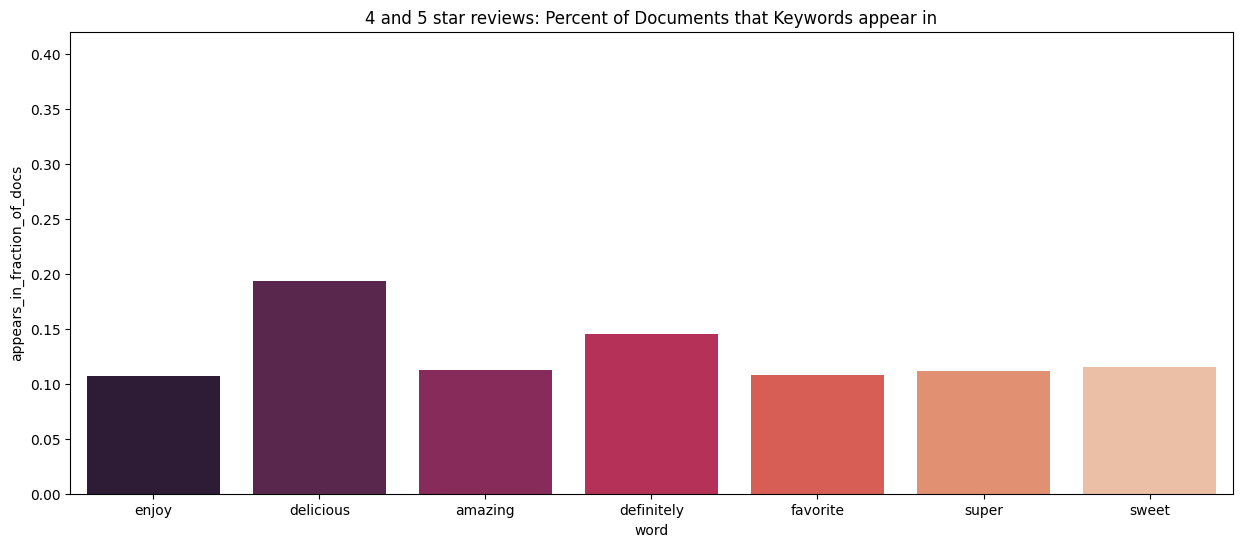

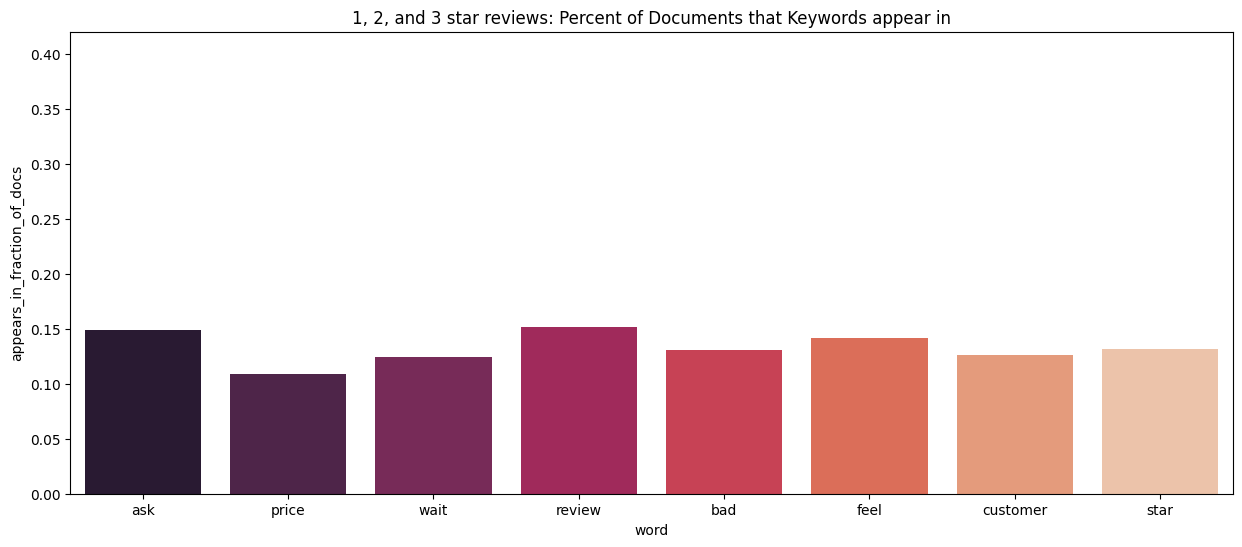

In [ ]:
import seaborn as sns

plt.figure(figsize=(15,6))
plt.title("4 and 5 star reviews: Percent of Documents that Keywords appear in")
sns.barplot(x=df_pos_keywords.word, y=df_pos_keywords.appears_in_fraction_of_docs, palette="rocket", order=good_key_words);
plt.ylim(0,.42)
plt.show();

plt.figure(figsize=(15,6))
plt.title("1, 2, and 3 star reviews: Percent of Documents that Keywords appear in")
sns.barplot(x=df_neg_keywords.word, y=df_neg_keywords.appears_in_fraction_of_docs, palette="rocket", order=bad_key_words);
plt.ylim(0,.42)
plt.show();